In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Heart Attack.csv")

Cardiovascular illnesses (CVDs) are the major cause of death worldwide. CVDs include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other heart and blood vessel problems. According to the World Health Organization, 17.9 million people die each year. Heart attacks and strokes account for more than four out of every five CVD deaths, with one-third of these deaths occurring before the age of 70. A comprehensive database for factors that contribute to a heart attack has been constructed.

- Age
- gender (0 for Female, 1 for Male) 
- heart rate (impulse)
- systolic BP (pressurehight)
- diastolic BP (pressurelow) 
- blood sugar (glucose) 
- CK-MB (kcm)
- Test-Troponin (troponin) 
- output field pertains to the presence of heart attack (class)

In [3]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


#### Making columns "class" as column "heart_attack" type int, neagtive = 0, positive = 1

In [4]:
df['heart_attack'] = df['class'].map({'negative': 0, 'positive': 1})
df = df.drop("class",axis=1)

In [5]:
df.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
heart_attack     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   heart_attack   1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


## Data Cleaning

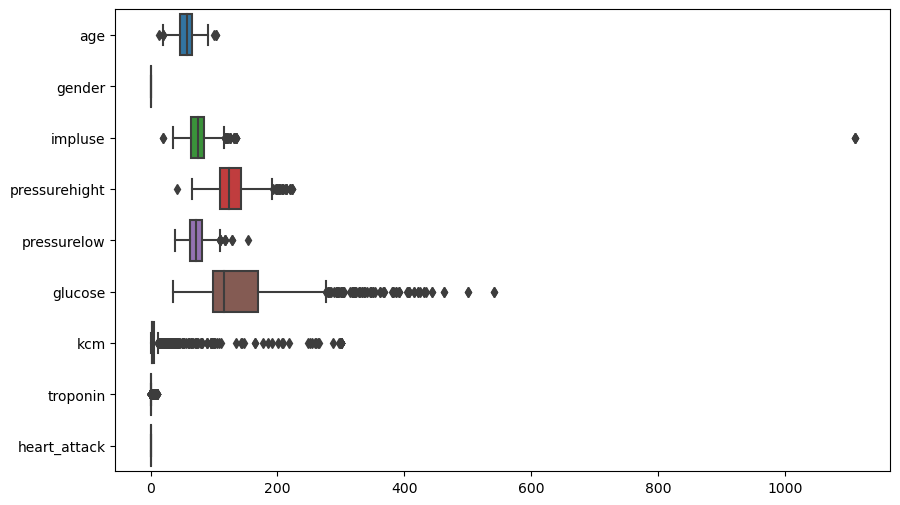

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient="h");

#### Removing points to far from iqr

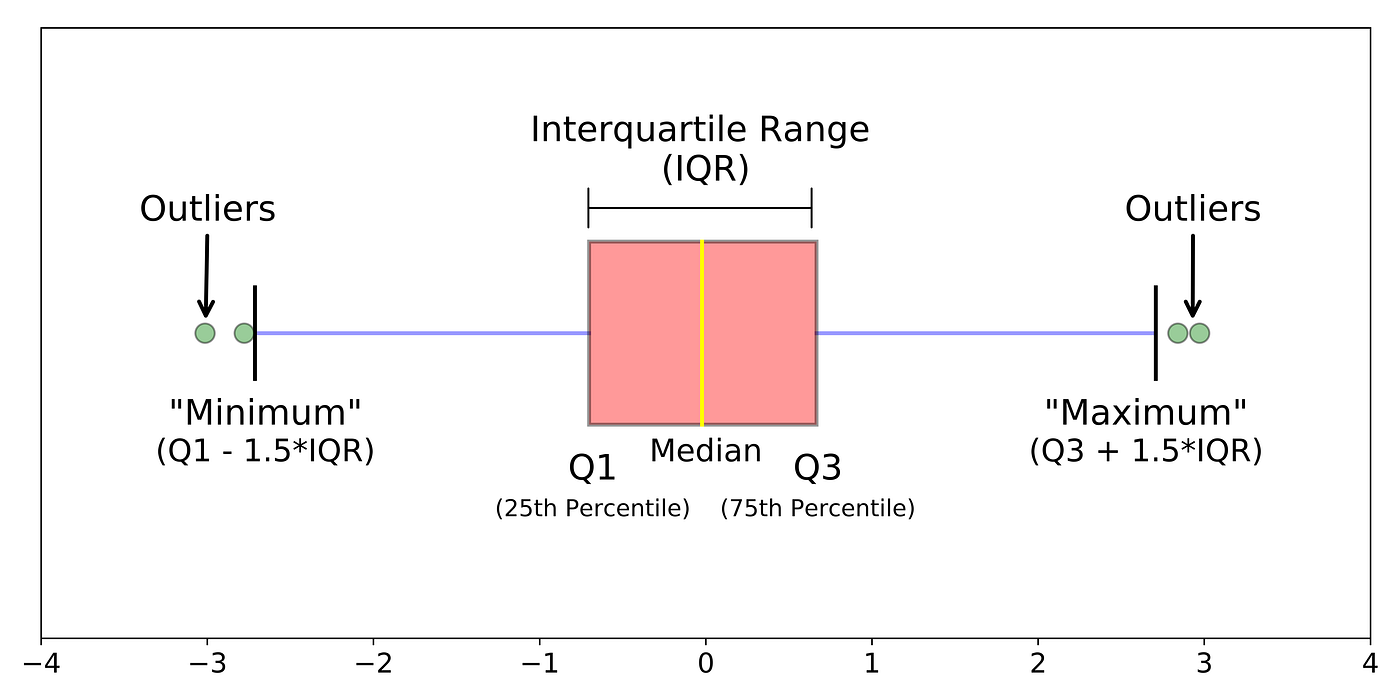
https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

From Impluse

In [8]:
q75, q25 = np.percentile(df["impluse"], [75, 25])
iqrMax = q75  + q25
iqrMax

149.0

In [9]:
q75, q25 = np.percentile(df["impluse"], [75, 25])
iqrMin = q75  - q25
iqrMin

21.0

In [10]:
df = df.drop(df[df["impluse"] < 21].index, axis=0)
df = df.drop(df[df["impluse"] > 149].index, axis=0)

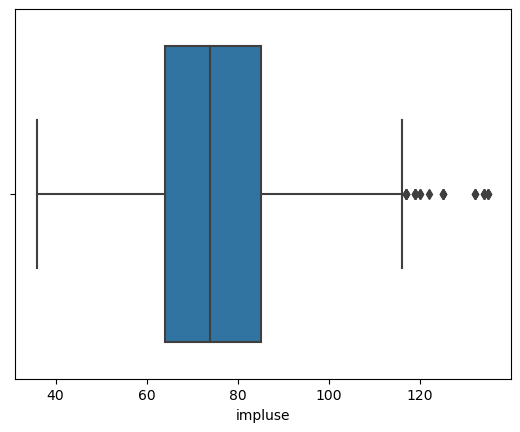

In [11]:
sns.boxplot(data=df, x="impluse");

From pressurelow

In [12]:
q75, q25 = np.percentile(df["pressurelow"], [75, 25])
iqrMax = q75  + q25
iqrMax

142.75

In [13]:
df = df.drop(df[df["pressurelow"] > 142.75].index, axis=0)

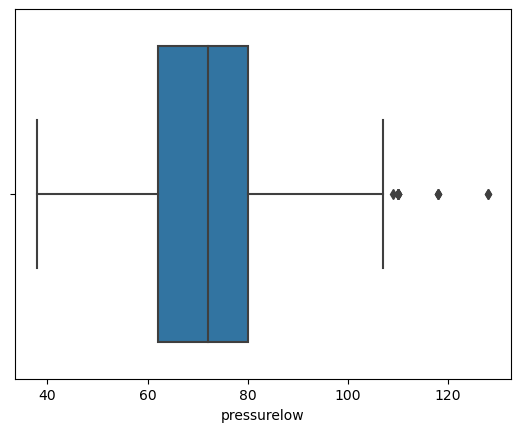

In [14]:
sns.boxplot(data=df, x="pressurelow");

From glucose q95, due to large deviations

In [15]:
q95, q25 = np.percentile(df["glucose"], [95, 25])
iqrMax = q95  + q25
iqrMax

406.5999999999988

In [16]:
df = df.drop(df[df["glucose"] > 406.59].index, axis=0)

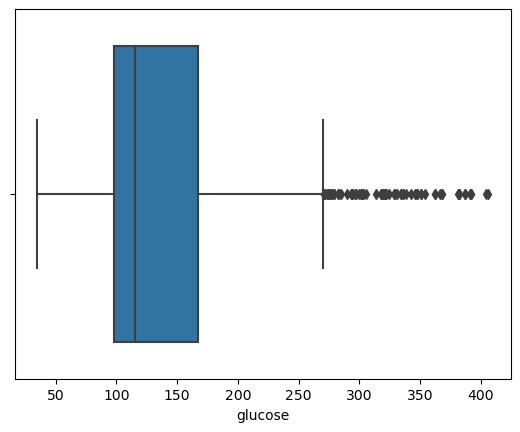

In [17]:
sns.boxplot(data=df, x="glucose");

In [18]:
q95, q25 = np.percentile(df["kcm"], [95, 25])
iqrMax = q95  + q25
iqrMax

72.85799999999992

In [19]:
df = df.drop(df[df["kcm"] > 72.85].index, axis=0)

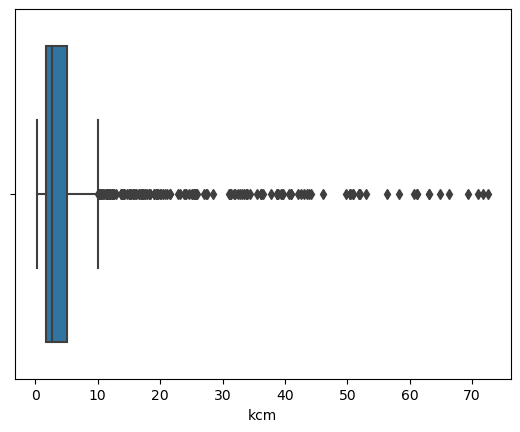

In [20]:
sns.boxplot(data=df, x="kcm");

In [21]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,heart_attack
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,56.095045,0.661251,76.023558,127.324127,72.243704,141.796669,6.134548,0.368539,0.594639
std,13.529609,0.473477,15.086103,25.839179,13.872148,65.669883,10.302750,1.180511,0.491161
min,14.000000,0.000000,36.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.630000,0.006000,0.000000
50%,57.000000,1.000000,74.000000,125.000000,72.000000,115.000000,2.720000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,144.000000,81.000000,166.000000,5.020000,0.088000,1.000000
max,103.000000,1.000000,135.000000,223.000000,128.000000,406.000000,72.600000,10.300000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1231 non-null   int64  
 1   gender         1231 non-null   int64  
 2   impluse        1231 non-null   int64  
 3   pressurehight  1231 non-null   int64  
 4   pressurelow    1231 non-null   int64  
 5   glucose        1231 non-null   float64
 6   kcm            1231 non-null   float64
 7   troponin       1231 non-null   float64
 8   heart_attack   1231 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 96.2 KB


Deled 88 rows

## Data Visualization

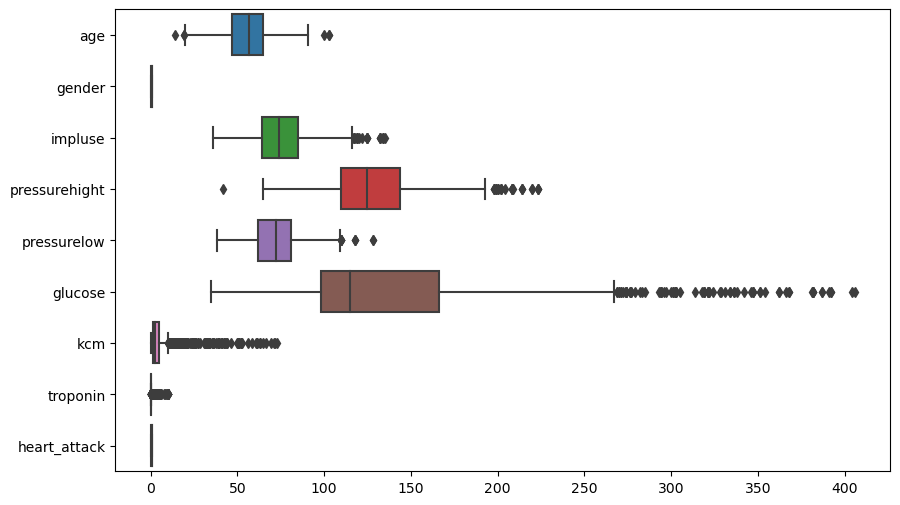

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient="h");

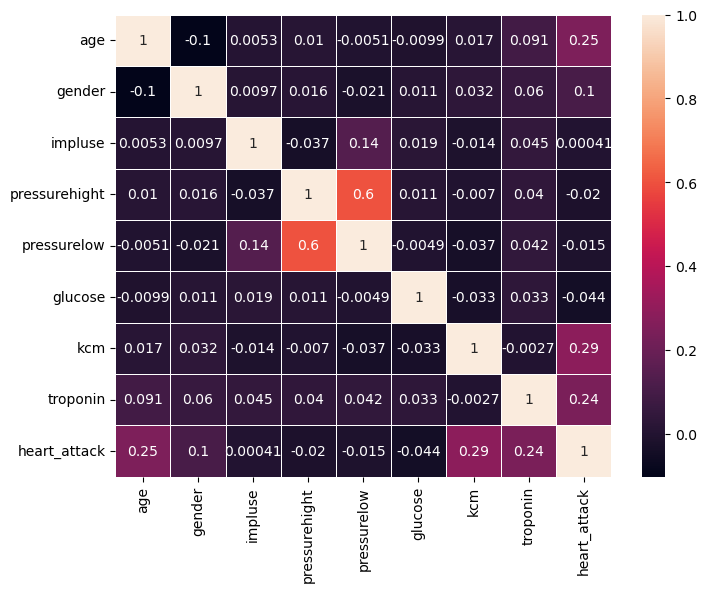

In [24]:
bsns.heatmap(df.corr(), annot=True, linewidths=0.5);

Age, gender, impluse, kcm and troponin have positive correlation with class heart_attack

 gender (0 for Female, 1 for Male)

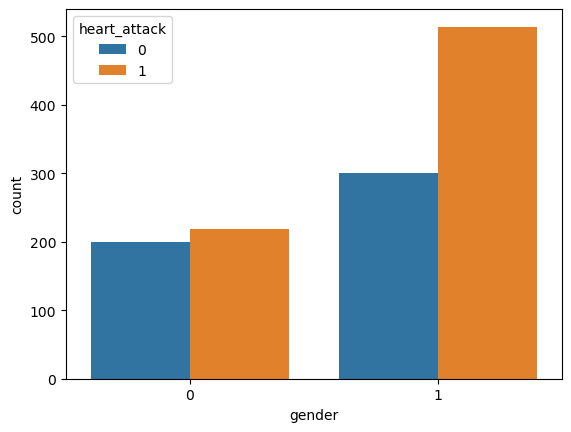

In [25]:
sns.countplot(data=df, x="gender", hue= "heart_attack");

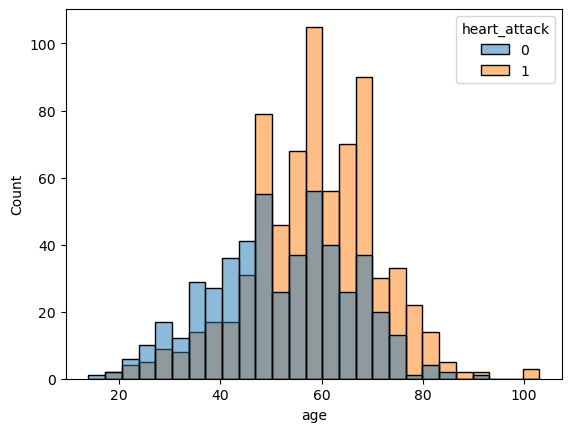

In [26]:
sns.histplot(data=df, x="age", hue="heart_attack");

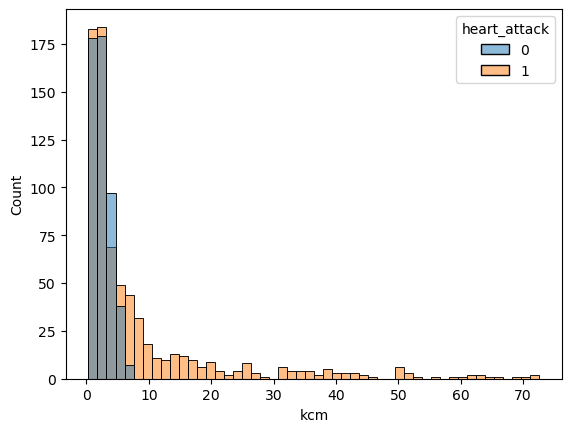

In [27]:
sns.histplot(data=df, x="kcm", hue="heart_attack", bins=50);

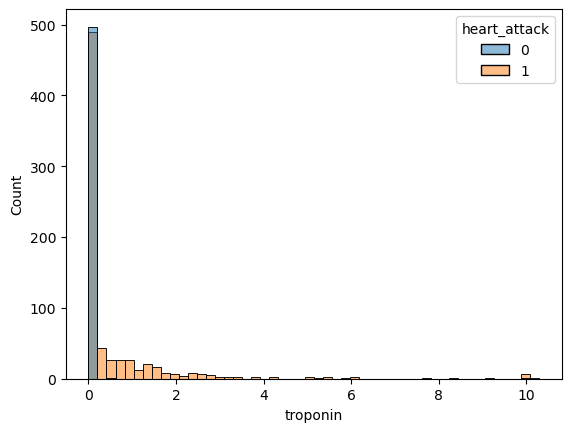

In [28]:
sns.histplot(data=df, x="troponin", hue="heart_attack", bins=50);

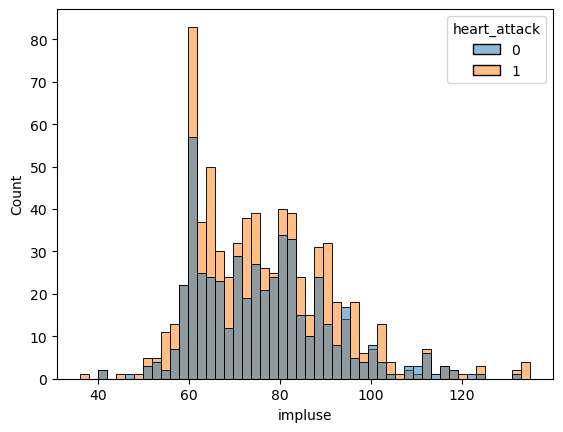

In [29]:
sns.histplot(data=df, x="impluse", hue= "heart_attack", bins=50);

As we can see kcm and troponin have very similar histograms. Values just above 0 cause heart attack

## Models

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
X = df.drop("heart_attack", axis=1)
y = df["heart_attack"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

Scaling functions due to different numbers

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating classifires

In [34]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()

Choosing parameters grid for RandomForestClassifier

In [35]:
param_grid_rfc = {"n_estimators":[50, 72, 100, 128], "max_features":[2,3,4,5], 
                  "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 4, 9]}

Choosing parameters grid for GradientBoostingClassifier

In [36]:
param_grid_gbc = {"n_estimators":[50, 72, 100, 128], "learning_rate":[0.1, 0.05, 0.2],
                  "max_depth":[3,4,5,6],  "min_samples_split": [2, 5, 10],
                  "min_samples_leaf": [1, 4, 9], "criterion":["squared_error"]}

Choosing parameters grid for AdaBoostClassifier

In [37]:
param_grid_abc = {"n_estimators":[5, 10, 15, 25, 40, 50], "learning_rate":[0.1, 0.05, 0.2]}

Fitting data

In [38]:
grid_rfc = GridSearchCV(rfc, param_grid_rfc)

grid_gbc = GridSearchCV(gbc, param_grid_gbc)

grid_abc = GridSearchCV(abc, param_grid_abc)

In [39]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 4, 9],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 72, 100, 128]})

In [40]:
grid_gbc.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 4, 9],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 72, 100, 128]})

In [41]:
grid_abc.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'n_estimators': [5, 10, 15, 25, 40, 50]})

In [42]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

Making predictions for models

In [43]:
preds_gbc = grid_gbc.predict(X_test)
preds_rfc = grid_rfc.predict(X_test)
preds_abc = grid_abc.predict(X_test)

In [44]:
def model_metrics(preds, grid_model):
    print(f"Best Parameters: {grid_model.best_params_}\n")
    print(f"Accuracy score: {accuracy_score(y_test, preds)}\n")
    print(f"Classification report:\n{classification_report(y_test, preds)}\n")
    feat_importacne = grid_model.best_estimator_.feature_importances_
    feat_importance = pd.DataFrame(index=X.columns, data=feat_importacne, columns=["Importance"])
    print(f"Feature importance:\n{feat_importance.sort_values(ascending=False, by='Importance')}\n")
    print("Confiusion Matrix:")
    ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

Metrics for the GradientBoostingClassifier

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 50}

Accuracy score: 0.987012987012987

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       133
           1       0.99      0.98      0.99       175

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308


Feature importance:
               Importance
troponin         0.657274
kcm              0.326953
gender           0.013028
pressurelow      0.001490
glucose          0.000647
pressurehight    0.000394
impluse          0.000205
age              0.000008

Confiusion Matrix:


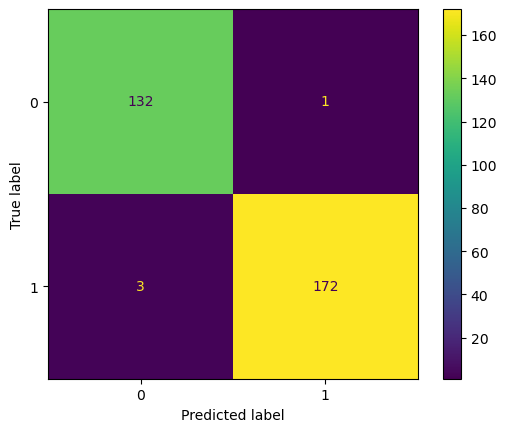

In [45]:
model_metrics(preds_gbc, grid_gbc)

Metrics for the RandomForestClassifier

Best Parameters: {'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

Accuracy score: 0.9805194805194806

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       133
           1       0.99      0.97      0.98       175

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308


Feature importance:
               Importance
troponin         0.613247
kcm              0.226835
age              0.070174
glucose          0.021100
pressurehight    0.020371
pressurelow      0.019900
impluse          0.019205
gender           0.009169

Confiusion Matrix:


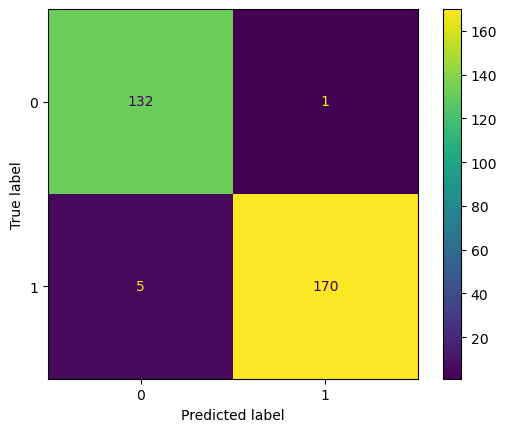

In [46]:
model_metrics(preds_rfc, grid_rfc)

Metrics for the AdaBoostClassifier

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 10}

Accuracy score: 0.9805194805194806

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       133
           1       0.99      0.97      0.98       175

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308


Feature importance:
               Importance
troponin              0.7
kcm                   0.3
age                   0.0
gender                0.0
impluse               0.0
pressurehight         0.0
pressurelow           0.0
glucose               0.0

Confiusion Matrix:


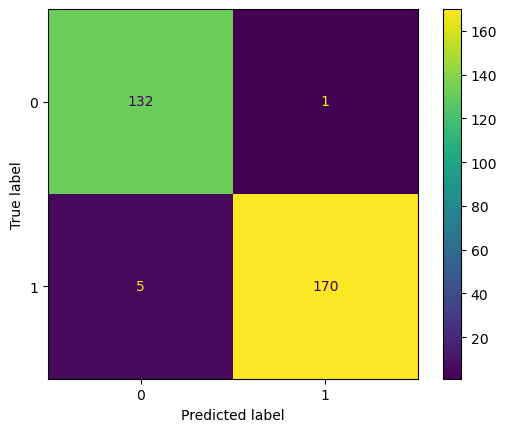

In [47]:
model_metrics(preds_abc, grid_abc)

#### Little Conclusion

As we can see, the predictions for the AdaBoostClassifier and RandomForestClassifier models are almost the same, but GradientBoostingClassifier did the best, it has 2 fewer errors. 

For all classes, troponin and kcm are the most important features, and decision-making models rely mostly on them

For bonus lets see how GradientBoostingClassifier will act without them

## Bonus

In [58]:
X_b = df.drop(["heart_attack", "kcm", "troponin"], axis=1)
y_b = df["heart_attack"]

In [59]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.25, random_state=8)

In [60]:
scaler = StandardScaler()
scaler.fit(X_train_b)
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

In [61]:
gbc_b = GradientBoostingClassifier()

In [62]:
param_grid_gbc_b = {"n_estimators":[50, 72, 100, 128], "learning_rate":[0.1, 0.05, 0.2],
                  "max_depth":[3,4,5,6],  "min_samples_split": [2, 5, 10],
                  "min_samples_leaf": [1, 4, 9]}

In [63]:
grid_gbc_b = GridSearchCV(gbc_b, param_grid_gbc_b)

In [64]:
grid_gbc_b.fit(X_train_b, y_train_b)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 4, 9],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 72, 100, 128]})

In [65]:
preds_gbc_b = grid_gbc_b.predict(X_test_b)

In [66]:
def model_metrics_b(preds, grid_model):
    print(f"Best Parameters: {grid_model.best_params_}\n")
    print(f"Accuracy score: {accuracy_score(y_test, preds)}\n")
    print(f"Classification report:\n{classification_report(y_test, preds)}\n")
    feat_importacne = grid_model.best_estimator_.feature_importances_
    feat_importance = pd.DataFrame(index=X_b.columns, data=feat_importacne, columns=["Importance"])
    print(f"Feature importance:\n{feat_importance.sort_values(ascending=False, by='Importance')}\n")
    print("Confiusion Matrix:")
    ConfusionMatrixDisplay.from_estimator(grid_model, X_test_b, y_test_b)

Best Parameters: {'max_features': 2, 'min_samples_leaf': 9, 'min_samples_split': 10, 'n_estimators': 50}

Accuracy score: 0.6233766233766234

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.39      0.47       133
           1       0.63      0.80      0.71       175

    accuracy                           0.62       308
   macro avg       0.62      0.60      0.59       308
weighted avg       0.62      0.62      0.61       308


Feature importance:
               Importance
age              0.341014
glucose          0.171598
pressurehight    0.170596
impluse          0.132622
pressurelow      0.130821
gender           0.053349

Confiusion Matrix:


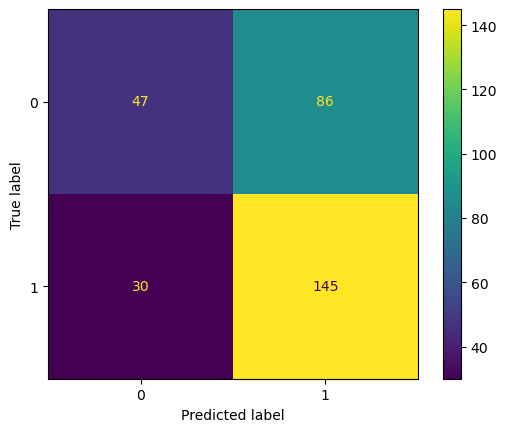

In [67]:
model_metrics_b(preds_gbc_b, grid_rfc_b)